# CS145: The Impact of COVID-19 on the Iowa Liquor Market

## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Tyler Vo, tylervvo*
* *Sophia Andrikopoulos, sophiala*

## Project Overview

---

While the pandemic has wreaked havoc throughout the economy, there exist some businesses that have benefitted from the wide-spread social distancing. Social media giants and video software companies have all seen a modest increase in revenue in 2020. We are interested in these silver linings. In particular, we are interested to see if the liquor stores have benefited from the pandemic. Our hypothesis is that liquor consumption may have drastically changed during the pandemic as a result of an increase in social distancing and the closures of bars and clubs. Specifically, we hypothesize that liquor stores may have had an increase in revenue throughout this pandemic and that consumer patterns with liquor consumption has also changed. 

To better understand this, we will look closely at Iowa liquor sales as a case study. We will be investigating the following questions.


1.   How did liquor consumption in Iowa look like before the pandemic?
2.   How did liquor consumption in Iowa change after the pandemic?

These high-level questions can be further broken down into more specific guiding questions. Specifically, we will want to investigate changes in liquor consumption in a variety of lenses. Namely, we would want to answer the following questions.

1.   How has liquor consumption changed geographically?
2.   How have consumer preferences changed? 
3.   How has the rate of consumption changed? 
4.   How has the price of liquor changed?

Answering these questions will be central in understanding how liquor industry has been affected by the pandemic.

---


## Analysis of Dataset



---
The Iowa Liquor Sales dataset contains an entry for each wholesale liquor purchase in Iowa from January 3, 2012 to October 31, 2020. This database only tracks wholesale purchases, i.e. purchases made by grocery stores, liquor stores, etc. with intent to sell in the retail space. However, because the State of Iowa controls the wholesale distribution of liquor intended for retail sale, this dataset provides an accurate look at retail liquor sales in Iowa as well.

This dataset is one 5.2 GB table consisting of 19,884,006 rows. Each row has the following fields:

| Field Name              | Description                                                                                             |
|-------------------------|---------------------------------------------------------------------------------------------------------|
| invoice_and_item_number | corresponds to one line of an invoice and acts as a unique identifier for each product in a given order |
| date                    | the date of the order                                                                                   |
| store_number            | unique identifier for the store purchasing the liquor                                                   |
| store_name              | the store purchasing the liquor                                                                         |
| address                 | address of the store that ordered the liquor                                                            |
| city                    | city where the purchasing store is located                                                              |
| zip_code                | zip code where the purchasing store is located                                                          |
| store_location          | geocoded location of the purchasing store, in string format                                             |
| county_number           | county number of county where purchasing store is located                                               |
| county                  | county where purchasing store is located                                                                |
| category                | category code of the liquor purchased                                                                   |
| category_name           | category name of the liquor purchased                                                                   |
| vendor_number           | unique identifier number of the company of the brand of liquor purchased                                |
| vendor_name             | name of the company for the brand of liquor purchased                                                   |
| item_number             | item number for the liquor product                                                                      |
| item_description        | description of the liquor product                                                                       |
| pack                    | number of bottles in a case for the product ordered                                                     |
| bottle_volume_ml        | volume of each individual bottle ordered in mL                                                          |
| state_bottle_cost       | the amount the Iowa Alcoholic Beverages Division paid for each bottle                                   |
| state_bottle_retail     | the amount the store paid for each bottle                                                               |
| bottles_sold            | the number of bottles purchased by the store                                                            |
| sale_dollars            | the total amount paid for by the store (bottles_sold * state_bottle_retail)                             |
| volume_sold_liters      | the total volume purchased by the store in Liters (bottles_sold * bottle_volume_ml)/1000                |
| volume_sold_gallons     | the total volume purchased by the store in gallons (bottles_sold * bottle_volume_ml)/3785.4             |

We can make some conclusions based off the database that will be helpful when doing our analyses.
*  The primary key of the dataset is invoice_and_item_number.
*  We can assume that the pandemic started the beginning of 2020. We can use this information to create two separate tables --one for pre-pandemic data and one for pandemic data-- and join them as a way to compare the difference between these two time periods. 
*  All variables of the dataset are represented as **strings**, with the exception of the date of purchase (**date**), values tracking quantity (**integer**), and monetary values (**float**). 
*  Additionally, another distinction is that bottle volume is represented as an integer, while the values for total volume sold in liters and gallons are floats. We can assume this is because the total volume of alcohol would need to be more precisely measured.
* The categories and category codes for liquor are inconsistent. For example, category 1081100, "Coffee Liqueurs" , under which "Kahlua Coffee Mini" is listed, is separate from category 1081030, "COFFEE LIQUEURS", under which "Kahlua Coffee Liqueur" is listed. We addressed these inconsistencies by running case-insensitive queries when working with categorical data. 
* There are certain categories that mean the same thing, which have been combined as shown in the first part of our data exploration.

----

## Data Exploration

Let's set up our environment before we begin our analyses!

In [ ]:
from google.colab import auth
auth.authenticate_user() 
project_id = "reliable-return-291322"

In [ ]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "project-3-295318"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import math
import numpy as np
import seaborn as sns

---
### Understanding Liquor Sales by the Number of Transactions

Let's first understand how liquor consumption may have changed since the pandemic. We can understand changes in liquor consumption habits just by looking at the number of liquor transactions in Iowa! Specifically, We can use the number of unique liquor transactions as a proxy for increase in liquor demand.  *We will examine the number of transactions each month that occured in 2019 and 2020 respectively.*



In [ ]:
%%bigquery --project $project_id number_of_transactions
SELECT table1.month, table1.number as Num_2019, table2.number as Num_2020, (table2.number-table1.number)/table1.number as percent_increase
FROM (
SELECT EXTRACT(month from date) as month, COUNT(invoice_and_item_number) as number
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) = 2019
GROUP BY EXTRACT(month from date)
) table1,
(
SELECT EXTRACT(month from date) as month, COUNT(invoice_and_item_number) as number
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) = 2020
GROUP BY EXTRACT(month from date)
) table2
where table1.month = table2.month
ORDER BY month DESC

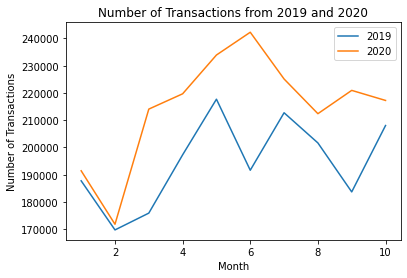

In [ ]:
%matplotlib inline
names = number_of_transactions["month"]
values = number_of_transactions["Num_2019"]
values_2 = number_of_transactions["Num_2020"]

plt.plot(names, values, label="2019")
plt.plot(names, values_2, label="2020")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.title('Number of Transactions from 2019 and 2020')

plt.legend(loc='best')

plt.show()

Neat! We can see from this graph that 2020 does not prescribe to the same liquor consumption pattern as the previous year. The first two months of 2020 are very closely aligned with the "normal" trend from 2019, as is expected, since COVID-19 actually reached Iowa in March 2020. Additionally, we can also see that 2020 has had more transactions than 2019! To better understand this relationship, *let's take a look at the monthly percentage increase between these two years.*

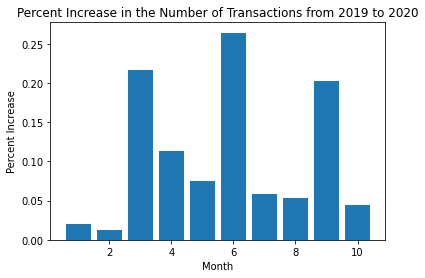

In [ ]:
%matplotlib inline
names = number_of_transactions["month"]
values_3 = number_of_transactions["percent_increase"]
plt.bar(names, values_3)
plt.xlabel("Month")
plt.ylabel("Percent Increase")
plt.title('Percent Increase in the Number of Transactions from 2019 to 2020')
plt.show()

We can conclude from this graph that there are three major peaks in the number of liquor transaction: March, June, September. This makes a lot of sense because the major pandemic outbreaks in the United States happen to have happen during those three months! From our analyses we can conclude the following:
* The number of transactions in 2020 was modestly greater than that of 2019
* We can make an assumption that the pandemic's severity seems to have some correlation with the number of liquor transactions in Iowa. This is evident in the peaks in increase in the number of transactions between 2019 and 2020. 

### Understanding Iowa's Liquor Consumption Geographically
Now let's explore how Iowa's liquor consumption has changed at a geographically. To do this *we will explore the revenue generated at a county level and city level before the pandemic.*

In [ ]:
%%bigquery --project $project_id county_geo
SELECT UPPER(county), COUNT(invoice_and_item_number) as Count
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
GROUP BY UPPER(county)
ORDER BY COUNT(invoice_and_item_number) DESC
LIMIT 10

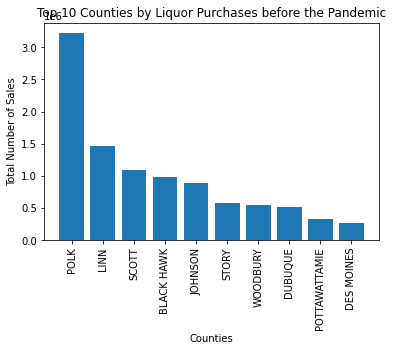

In [ ]:
%matplotlib inline
plt.figure()
plt.bar(county_geo["f0_"], county_geo["Count"])
plt.xlabel("Counties")
plt.ylabel("Total Number of Sales")
plt.xticks(rotation=90)
plt.title("Top 10 Counties by Liquor Purchases before the Pandemic")
plt.show()

In [ ]:
%%bigquery --project $project_id city_geo
SELECT UPPER(city), COUNT(invoice_and_item_number) as Count
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
GROUP BY UPPER(city)
ORDER BY COUNT(invoice_and_item_number) DESC
LIMIT 10

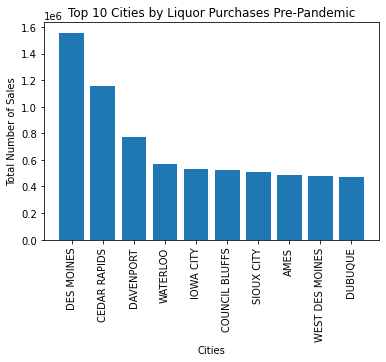

In [ ]:
%matplotlib inline
plt.figure()
plt.bar(city_geo["f0_"], city_geo["Count"])
plt.xlabel("Cities")
plt.ylabel("Total Number of Sales")
plt.xticks(rotation=90)
plt.title("Top 10 Cities by Liquor Purchases Pre-Pandemic")
plt.show()

Cool! Based off our observation we can see that the top three cities by liquor revenue are Des Moines, Cedar Rapids, and Davenport! The top three counties are Polk, Linn, and Scott. 

*Now we will calculate the average monthly revenue for these top 10 city between 2012-2019. We will then query the monthly revenue during the pandemic to have a side-by-side comparison of the average monthly revenue.*

Below is the SQL query for getting the monthly average revenue the top ten cities would receive between 2012-2019. Specifically, the query gets the average revenue for each month between 2012-2019 and then computes the averages of those month for a particular city. This will act as a proxy to understand what revenue would be under normal conditions.

In [ ]:
%%bigquery --project $project_id monthly_avg_top_10
SELECT Table1.City, table1.Monthly_Avg_2020, table2.Monthly_Avg_Not_2020, table1.Monthly_Avg_2020 - table2.Monthly_Avg_Not_2020 AS Difference, ((table1.Monthly_Avg_2020 - table2.Monthly_Avg_Not_2020)/table2.Monthly_Avg_Not_2020)*100 AS Percent_Increase
FROM
(
  SELECT City, AVG(SUM_SALE) AS Monthly_Avg_2020
  FROM(
    SELECT UPPER(city) AS City, EXTRACT(month from date) AS Month,  SUM(sale_dollars)/COUNT(DISTINCT(EXTRACT(year from date))) AS SUM_SALE
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(year from date) = 2020 AND UPPER(city) IN 
      ( SELECT UPPER(city)
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE EXTRACT(year from date) < 2020
        GROUP BY UPPER(city)
        ORDER BY COUNT(invoice_and_item_number) DESC
        LIMIT 10
      )
    GROUP BY UPPER(city), EXTRACT(month from date)
  )
  GROUP BY City
 ) table1, 
 (  SELECT City, AVG(SUM_SALE) AS Monthly_Avg_Not_2020
  FROM(
    SELECT UPPER(city) AS City, EXTRACT(month from date) AS Month,  SUM(sale_dollars)/COUNT(DISTINCT(EXTRACT(year from date))) AS SUM_SALE
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(year from date) < 2020 AND UPPER(city) IN 
      ( SELECT UPPER(city)
        FROM `bigquery-public-data.iowa_liquor_sales.sales`
        WHERE EXTRACT(year from date) < 2020
        GROUP BY UPPER(city)
        ORDER BY COUNT(invoice_and_item_number) DESC
        LIMIT 10
      )
    GROUP BY UPPER(city), EXTRACT(month from date)
  )
  GROUP BY City
 ) table2
 WHERE table1.City = table2.City


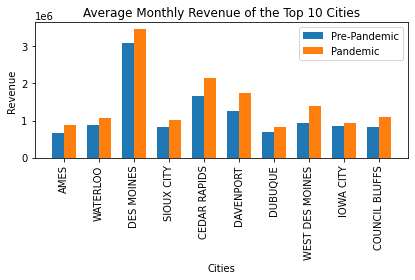

In [ ]:
labels = monthly_avg_top_10['City']
post = monthly_avg_top_10['Monthly_Avg_2020']
pre = monthly_avg_top_10['Monthly_Avg_Not_2020']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre, width, label='Pre-Pandemic')
rects2 = ax.bar(x + width/2, post, width, label='Pandemic')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue')
ax.set_xlabel('Cities')
ax.set_title('Average Monthly Revenue of the Top 10 Cities')
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig.tight_layout()

plt.show()

As we can see there seems to have been a modest increase in revenue for each of the top ten cities in Iowa since the pandemic! *To better understand the magnitude of the increase in revenue we have graphed the % increase in revenue since the pandemic for these top 10 cities.* 

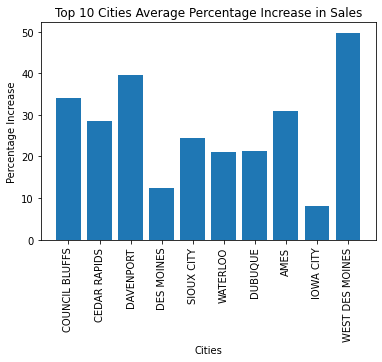

In [ ]:
%matplotlib inline
plt.figure()
plt.bar(monthly_avg_top_10['City'], monthly_avg_top_10['Percent_Increase'])
plt.xlabel("Cities")
plt.ylabel("Percentage Increase")
plt.xticks(rotation=90)
plt.title("Top 10 Cities Average Percentage Increase in Sales")
plt.show()

Wow! We see that on average all of the cities have had significant increase in liquor sales since the pandemic. We can specifically see that West Des Moines has had the biggest increase in revenue garnering more than a 49.7% increase in average monthly revenue in comparison to the pre-pandemic average monthly revenue. 

From our analyses we can conclude:
* The top three cities by liquor revenue are Des Moines, Cedar Rapids, and Davenport.
* The top three counties are Polk, Linn, and Scott. 
* All top ten cities have experience an increase in average monthly revenue 
* Cities like Des Moines and Davenport experience the sharpest increase in average monthly revenue! Good for them!

###The Iowa Liquor Market
Now that we know how the pandemic has affected the liquor market geographically, let's take a step back and take a look at macro trends in the industry before the pandemic. 

*Let's take a look at the Iowa Liquor Market before the pandemic.*

In [ ]:
%%bigquery --project $project_id retail_yr
SELECT EXTRACT(year from date) as year, SUM(sale_dollars)/1000000 as ret
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
GROUP BY year
ORDER BY year ASC

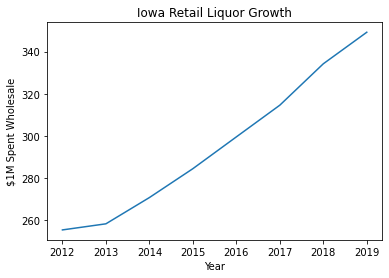

In [ ]:
plt.figure()
plt.plot(retail_yr["year"], retail_yr["ret"])
plt.title("Iowa Retail Liquor Growth")
plt.xlabel("Year")
plt.ylabel("$1M Spent Wholesale")
plt.autoscale()

That's awesome! It seems that the liquor market has grown consistently by about $10M each year this dataset was created.

Let's now investigate the liquor market at a more granular time frame. *Specifically, we will explore how the liquor market changes monthly.*

In [ ]:
%%bigquery --project $project_id retail_yr_m
SELECT EXTRACT(year from date) as year, EXTRACT(month from date) AS month, SUM(sale_dollars)/1000000 as mkt
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
GROUP BY month, year
ORDER BY year ASC, month ASC

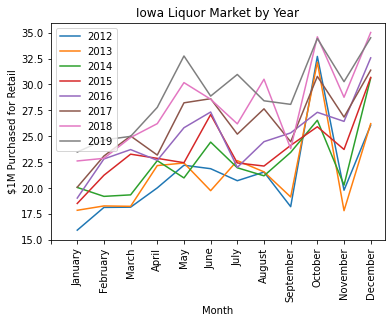

In [ ]:
df = pd.DataFrame(retail_yr_m)
dfs = [rows for _, rows in df.groupby('year')]

fig, ax = plt.subplots()
ax.plot(dfs[0]["month"], dfs[0]["mkt"], label="2012")
ax.plot(dfs[1]["month"], dfs[1]["mkt"], label="2013")
ax.plot(dfs[2]["month"], dfs[2]["mkt"], label="2014")
ax.plot(dfs[3]["month"], dfs[3]["mkt"], label="2015")
ax.plot(dfs[4]["month"], dfs[4]["mkt"], label="2016")
ax.plot(dfs[5]["month"], dfs[5]["mkt"], label="2017")
ax.plot(dfs[6]["month"], dfs[6]["mkt"], label="2018")
ax.plot(dfs[7]["month"], dfs[7]["mkt"], label="2019")
ax.set_title("Iowa Liquor Market by Year")
ax.set_xlabel("Month")
ax.set_ylabel("$1M Purchased for Retail")
ax.set_xticks(np.arange(13))
ax.set_xticklabels([" ","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()

Based off this visualization we are able to corroborate our conclusion above. Specifically, we know:
* For each subsequent year, revenue increases modestly (~$10M a year)
* It seems that liquor purchases increase steadily throughout the year, plateau in the summer months, than spike in October, dip in November, and spike again in December. 
* We hypothesize that these two spikes may be due to the presence of heavy-drinking holidays in October and December (Halloween, Christmas, New Year's Eve), although it is interesting that while Thanksgiving falls in November, the liquor market consistently takes a dive during that month.




In order to see how COVID-19 has changed the Iowa liquor market as a whole, we compare the total dollar value spent per month on wholesale liquor in Iowa in 2020 to historical data from 2018 and 2019.

In [ ]:
%%bigquery --project $project_id mkt
SELECT EXTRACT(year from date) as year, EXTRACT(month from date) AS month, SUM(sale_dollars)/1000000 as mkt
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) in (2018, 2019, 2020)
GROUP BY month, year
ORDER BY year ASC, month ASC

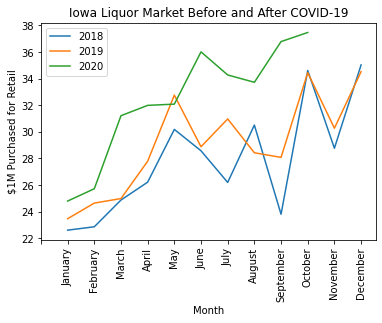

In [ ]:
df = pd.DataFrame(mkt)
dfs = [rows for _, rows in df.groupby('year')]

fig, ax = plt.subplots()
ax.plot(dfs[0]["month"], dfs[0]["mkt"], label="2018")
ax.plot(dfs[1]["month"], dfs[1]["mkt"], label="2019")
ax.plot(dfs[2]["month"], dfs[2]["mkt"], label="2020")
ax.set_title("Iowa Liquor Market Before and After COVID-19")
ax.set_xlabel("Month")
ax.set_ylabel("$1M Purchased for Retail")
ax.set_xticks(np.arange(13))
ax.set_xticklabels([" ","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()

From this graph we can conclude:
* 2020's monthly liquor sales do not prescribe to the same pattern as previous years.
* While the trends seem to match up in January and February, before COVID-19 reached Iowa, there is a marked increase in the liquor market in March and April, most likely due to stay-at-home orders and the closing of bars and restaurants. 
* In May 2020, the liquor market seems low, perhaps due to an ease in COVID-related restrictions that prompted Iowans to purchase liquor at bars and restaurants again before the weather improved and COVID-19 cases rose, as ever since June there has been a marked increase in retail liquor sales compared to previous years.

### Pricing Distribution of Liquor 

Let's understand the pricing distribution of liquor before the pandemic and see how consumer behaviors may have changed. *Let's take a look at the distribution of prices of liquor before the pandemic.*

In [ ]:
%%bigquery --project $project_id price_dist
SELECT state_bottle_retail
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020

In [ ]:

print("Min: ", np.min(price_dist))
print("Max: ", np.max(price_dist))
print("Mean: ", np.nanmean(price_dist))
print("Median: ", np.nanmedian(price_dist))
print("sd: ", np.std(price_dist))


Min:  state_bottle_retail    0.0
dtype: float64
Max:  state_bottle_retail    11520.0
dtype: float64
Mean:  14.784864012808923
Median:  12.27
sd:  state_bottle_retail    16.264283
dtype: float64


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


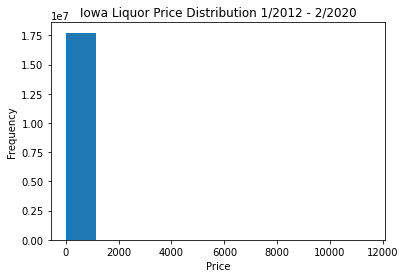

In [ ]:
plt.figure()
plt.hist(price_dist["state_bottle_retail"])
plt.title("Iowa Liquor Price Distribution 1/2012 - 2/2020")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.autoscale()

Woah! It seems that there are a lot of high-priced outliers, but not enough to bring the mean significantly above the median. For this analysis, we will call a bottle "high-price" if it costs over \$100. Anything below \$100 is considered to be in the "normal" range. For analyses that take into consideration pricing distribution, assume we are working only with data in the "normal" price range unless we indicate otherwise. Let's filter the high-price bottles out to get the distribution of our "normal" range liquors:

In [ ]:
%%bigquery --project $project_id price_dist
SELECT state_bottle_retail
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE date < '2020-03-01'
AND state_bottle_retail < 100

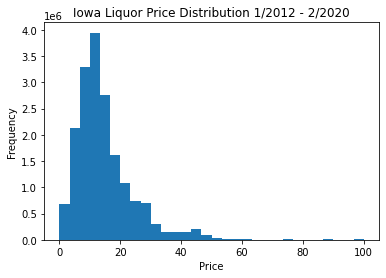

In [ ]:
plt.figure()
plt.hist(price_dist["state_bottle_retail"], bins=30)
plt.title("Iowa Liquor Price Distribution 1/2012 - 2/2020")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.autoscale()

Much better! We see that the distribution of liquor prices is skewed to the right with a majority of all transaction including liquor that cost between us \$10 to get \$20. 
Let's also take a look at how many data points we're excluding by eliminating outliers.

In [ ]:
%%bigquery --project $project_id
SELECT count(*)
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE date < '2020-03-01'
AND state_bottle_retail >=100

,f0_
0,16594


That seems like a lot, but given that it's over the span of 8 years and compared to the occurrences we see above, this number is fairly low and the values removed can still be considered outliers. *Let's now take a look at how the average price of liquor has changed over the years.*

In [ ]:
%%bigquery --project $project_id ppm

SELECT EXTRACT(year from date) as year, avg(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
AND state_bottle_retail < 100
GROUP BY year
ORDER BY year

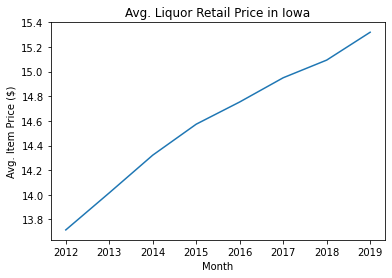

In [ ]:
plt.figure()
plt.plot(ppm["year"], ppm["avg_price"])
plt.title("Avg. Liquor Retail Price in Iowa")
plt.xlabel("Month")
plt.ylabel("Avg. Item Price ($)")
plt.autoscale()

Interestingly, we can observe that the average price of liquor seems to increase over the years between 2012-2019, but only by about \$0.20 a year.

*Let's explore how liquor prices change throughout the months.*

In [ ]:
%%bigquery --project $project_id ppm2

SELECT EXTRACT(month from date) as month, avg(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
AND state_bottle_retail < 100
GROUP BY month
ORDER BY month

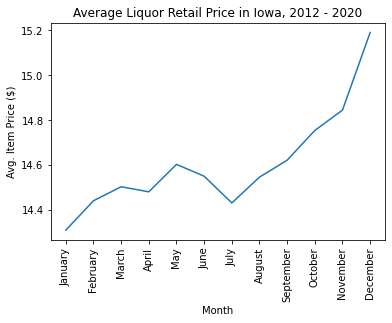

In [ ]:
plt.figure()
plt.plot(ppm2["month"], ppm2["avg_price"])
plt.title("Average Liquor Retail Price in Iowa, 2012 - 2019")
plt.xlabel("Month")
plt.ylabel("Avg. Item Price ($)")
plt.xticks(np.arange(13), ["","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90)
plt.autoscale()

Cool! We can make an assumption that people tend to buy more expensive liquor during holiday season October - December. This makes a lot of sense given the fact that parties and celebrations tend to happend during this time period. 

Now that we have a general understanding of liquor price distribution in Iowa, let's investigate how this might have changed since the pandemic. *Next, we compare the average liquor retail price per month from 2012-2019 to the average liquor retail price per month during the pandemic in order to better characterize the average Iowan's liquor spending habits during COVID-19.*

In [ ]:
%%bigquery --project $project_id delta_ppm

SELECT b.month, before, after
FROM
  (SELECT EXTRACT(month from date) as month, avg(state_bottle_retail) as before
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE date < '2020-01-01'
  AND state_bottle_retail < 100
  GROUP BY month) b,
  (SELECT EXTRACT(month from date) as month, avg(state_bottle_retail) as after
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE date > '2020-01-01'
  AND state_bottle_retail < 100
  GROUP BY month) a
WHERE b.month = a.month
AND b.month BETWEEN 3 and 10
ORDER BY b.month asc

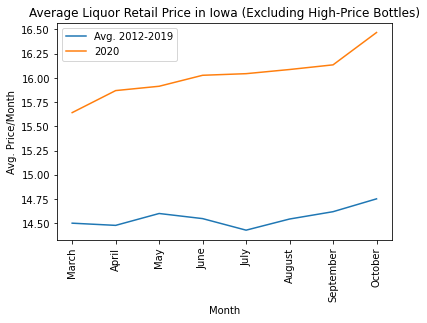

In [ ]:
fig, hp = plt.subplots()
pre = hp.plot(delta_ppm["month"], delta_ppm["before"], label = "Avg. 2012-2019")
post = hp.plot(delta_ppm["month"], delta_ppm["after"], label = "2020")
hp.set_title("Average Liquor Retail Price in Iowa (Excluding High-Price Bottles)")
hp.set_xlabel("Month")
hp.set_ylabel("Avg. Price/Month")
hp.set_xticklabels(["", "March", "April", "May", "June", "July", "August", "September", "October"], rotation=90)
hp.legend()

Overall, there was about a \$1.25 increase in average liquor retail price in Iowa compared to the historical average. This could be for several reasons, including reactionary price markup from wholesalers and retailers, or a willingness to spend a bit more on liquor as a reaction to spending less at bars and restaurants. 

Finally, let's isolate high-priced liquor and see how consumer habits have changed since the pandemic. *Specifically, let's see how monthly consumer habits have changed since the pandemic when looking at the liquor prices.*



In [ ]:
%%bigquery --project $project_id delta_hp

SELECT b.month, before as before, after as after
FROM
  (SELECT EXTRACT(month from date) as month, COUNT(*) as before
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE state_bottle_retail > 100
  AND EXTRACT(year from date) = 2019
  GROUP BY month) b,
  (SELECT EXTRACT(month from date) as month, COUNT(*) as after
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE state_bottle_retail > 100
  AND date > '2020-02-28'
  GROUP BY month) a
WHERE b.month = a.month
AND b.month BETWEEN 3 AND 11
ORDER BY month asc

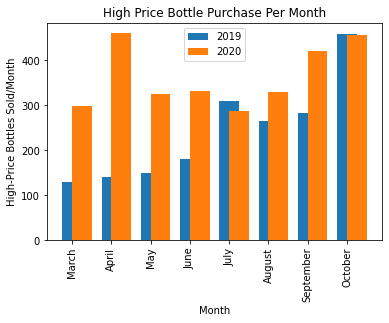

In [ ]:
index = np.arange(12)
bar_width = 0.5
fig, hp = plt.subplots()
pre = hp.bar(delta_hp["month"], delta_hp["before"], bar_width, label = "2019", align="center")
post = hp.bar(delta_hp["month"], delta_hp["after"], bar_width, label = "2020", align="edge")
hp.set_title("High Price Bottle Purchase Per Month")
hp.set_xlabel("Month")
hp.set_ylabel("High-Price Bottles Sold/Month")
hp.set_xticklabels(["", "March", "April", "May", "June", "July", "August", "September", "October"], rotation=90)
hp.autoscale()
hp.legend()

The amount of bottles of high-priced liquor purchased per month in 2020 is significantly higher than those made in 2019 during the first 2 months of the pandemic. Our previous analysis showed an average yearly increase of about 500 high-price bottle purchases, which the increase in purchases from 2019 to 2020 in just March and April surpass. This difference evens out by July, when high-price bottle purchases dip below the previous year and then climb slowly, dipping slightly again in October. The massive increase in high-priced bottle purchase at the beginning of the pandemic may be due to stay-at-home orders - perhaps consumers were more willing to spend more on alcohol to keep in their homes because they were no longer going out, but didn't purchase as many high-price bottles later in the year due to less strict stay-at-home orders and the economic impact of COVID-19. It is interesting that the trend of high-price bottle purchases during COVID-19 compared to the year prior closely reflects the overall market trends we explored previously.

We learned a lot of great insights from these analyses, here's a quick recap:
*  There are a few outliers in the pricing distribution of liquor-- we filtered these outliers out by filter for liquor < $100
* The pricing distribution of liquor is skewed to the right with a majority of liquor being in the \$10-\$20 range
* The average cost of liquor has been increasing year over year
* There was about a \$1.25 increase in average liquor retail price in Iowa compared to the historical average. This could be for several reasons, including reactionary price markup from wholesalers and retailers, or a willingness to spend a bit more on liquor as a reaction to spending less at bars and restaurants. 
* Patterns purchasing high-priced liquor do not align with precedent-- there was a sharp increase in high-priced bottles in the beginning of the pandemic 


###Analyzing Iowa's Choice in Liquor
Now that we have a good sense of how liquor pricing distribution has changed since the pandemic, let's take a look at how Iowa's choice of liquor has changed. 

First, *to get a sense of the most popular types of Liquor in Iowa before 2020, we queried the top 20 categories and number of bottles sold per year since the beginning of 2012.* The total sums of bottles sold from 2012 to the end of 2019 per category was transformed to get the total bottles sold per year since 2012 before 2020 by dividing by 8. 


Note in the following query, we merged serveral names that are equivalent in category.

In [ ]:
%%bigquery --project $project_id category_count2
SELECT
    LOWER(category_name),
    SUM(bottles_sold)/8000000 AS count
FROM  
  (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottles_sold, date
  FROM bigquery-public-data.iowa_liquor_sales.sales)
WHERE date < '2020-01-01'
GROUP BY
    LOWER(category_name)
ORDER BY SUM(bottles_sold) DESC
LIMIT 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

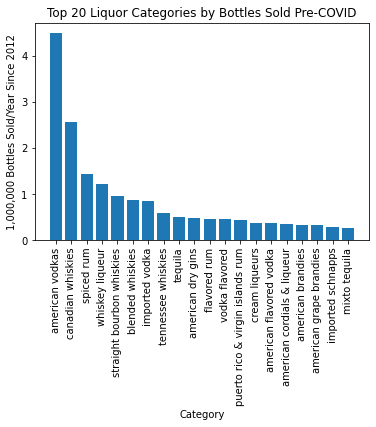

In [ ]:
plt.figure()
plt.bar(category_count2["f0_"], category_count2["count"])
plt.title("Top 20 Liquor Categories by Bottles Sold Pre-COVID")
plt.xlabel("Category")
plt.ylabel("1,000,000 Bottles Sold/Year Since 2012")
plt.xticks(rotation = 90)

After merging categories, American vodka is a clear winner among Iowans, trailed by Canadian whisky and spiced rum!


*In order to determine how choice in liquor in Iowa has changed since COVID-19, we compare historical average bottles sold per month to bottles sold per month during the pandemic.* The total sums of bottles sold from March to November from 2017-2019 per category were transformed to get average bottles sold per month during the relevant time period. We then compared the historical averages to the average bottles sold per month from March 2020 to present (7 months + half of November/8 months = .93). 

In [ ]:
%%bigquery --project $project_id bottle_change

SELECT b.category, b.count/8000000 as count_before, a.count/930000 as count_after
FROM
  (SELECT LOWER(category_name) as category, SUM(bottles_sold) AS count,
  FROM 
    (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottles_sold, date
    FROM bigquery-public-data.iowa_liquor_sales.sales)
  WHERE EXTRACT(year from date) < 2020 AND EXTRACT(month from date) BETWEEN 3 and 11
  AND EXTRACT(month from date) BETWEEN 3 and 10
  GROUP BY category) b,
  (SELECT LOWER(category_name) as category, SUM(bottles_sold) AS count,
  FROM 
    (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottles_sold, date
    FROM bigquery-public-data.iowa_liquor_sales.sales)
  WHERE EXTRACT(year from date) = 2020 AND EXTRACT(month from date) BETWEEN 3 and 10
  GROUP BY category) a
WHERE b.category = a.category
ORDER BY b.count DESC
LIMIT 20

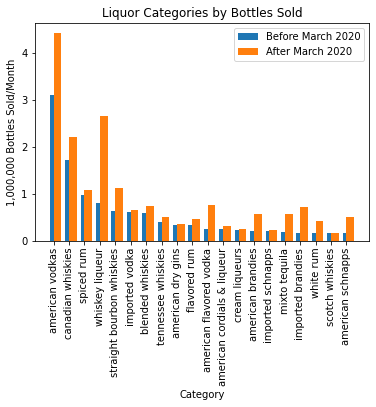

In [ ]:
index = np.arange(20)
bar_width = 0.5
fig, bs = plt.subplots()
pre = bs.bar(bottle_change["category"], bottle_change["count_before"], bar_width, label = "Before March 2020", align="center")
post = bs.bar(bottle_change["category"], bottle_change["count_after"], bar_width, label = "After March 2020", align="edge")
bs.set_title("Liquor Categories by Bottles Sold")
bs.set_xlabel("Category")
bs.set_ylabel("1,000,000 Bottles Sold/Month")
plt.setp(bs.xaxis.get_majorticklabels(), rotation=90)
bs.autoscale()
bs.legend()

Cool! We can see that aside from a general increase in number of bottles sold for each category of alcohol, we can see that 2020's liquor trends do not prescribe to pre-pandemic times. Specifically, we can see that straight bourbon whiskies, american flavored vodka, and imported brandies saw a sharp increase in bottles sold in 2020. 

###Price Distribution in Top Categories
To further examine the liquor preferences of Iowans, *we turn to analyzing the price distribution in the top 5 categories of liquor.* We include high-price liquors, since we sample our data to make the distributions readable.

In [ ]:
%%bigquery --project $project_id price_cat
SELECT LOWER(category_name) as category, state_bottle_retail
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE LOWER(category_name) IN ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
AND EXTRACT(year from date) < 2020
ORDER BY category

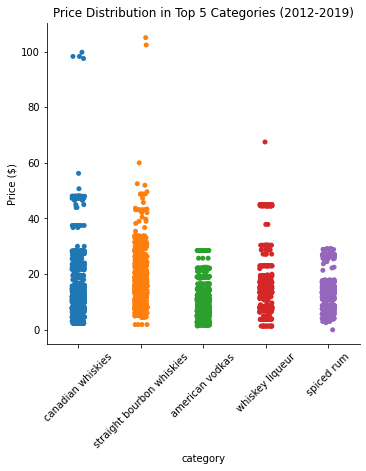

In [ ]:
df = pd.DataFrame(price_cat)
g = sns.catplot(x = "category", y = "state_bottle_retail",  data = df.sample(5000, replace = False), hue = "category").set(title = "Price Distribution in Top 5 Categories (2012-2019)", ylabel = "Price ($)")
g.set_xticklabels(rotation=45)

It seems that price is fairly evenly distributed among all categories. Canadian whiskies and straight bourbon whiskies tend to have more outliers with higher prices. The price distributions for American vodkas, blended whiskies, and spiced rums are also much narrower than the wider distributions of Canadian whiskies and straight bourbon whiskies. This may be due to the fact that American vodkas, blended whiskies, and spiced rum cater to a younger audience, while Canadian whiskies and straight bourbon whiskies cater to a wider audience and therefore contain items in a wider price range.


To see if price preference within each category changes throughout the year, *we plot the average price paid for items in each category by month from 2012 to 2019.*

In [ ]:
%%bigquery --project $project_id price_cat_m

SELECT LOWER(category_name) as category, EXTRACT(month from date) as month, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE LOWER(category_name) IN ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
AND date < '2020-01-01'
GROUP BY category, month
ORDER BY category, month ASC

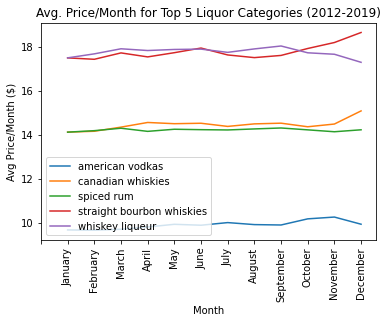

In [ ]:
df = pd.DataFrame(price_cat_m)
dfs = [rows for _, rows in df.groupby('category')]

fig, ax = plt.subplots()
ax.plot(dfs[0]["month"], dfs[0]["avg_price"], label="american vodkas")
ax.plot(dfs[1]["month"], dfs[1]["avg_price"], label="canadian whiskies")
ax.plot(dfs[2]["month"], dfs[2]["avg_price"], label="spiced rum")
ax.plot(dfs[3]["month"], dfs[3]["avg_price"], label="straight bourbon whiskies")
ax.plot(dfs[4]["month"], dfs[4]["avg_price"], label="whiskey liqueur")
ax.set_title("Avg. Price/Month for Top 5 Liquor Categories (2012-2019)")
ax.set_xlabel("Month")
ax.set_ylabel("Avg Price/Month ($)")
ax.set_xticks(np.arange(13))
ax.set_xticklabels([" ","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()

For the most part, the average price spent on liquor of any of the top 5 categories remains relatively constant throughout the year. The average Iowan to spend around \$18 for straight bourbon whiskies and whiskey liqueur, around \$14 for spiced rum and Canadian whiskies, and only \$10 for vodka.



There is a slight dip in price of whiskey liqueur in November and December, while there is a slight raise in the average price paid for Canadian whiskies in December.

Now let's compare the price distribution in the Top 5 Categories in 2020 to the historical distribution from 2018 and 2019


In [ ]:
%%bigquery --project $project_id price_cat
SELECT LOWER(category_name) as category, state_bottle_retail, EXTRACT(year from date) as Year
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE LOWER(category_name) IN ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
AND EXTRACT(year from date) IN (2018, 2019,2020)
ORDER BY category

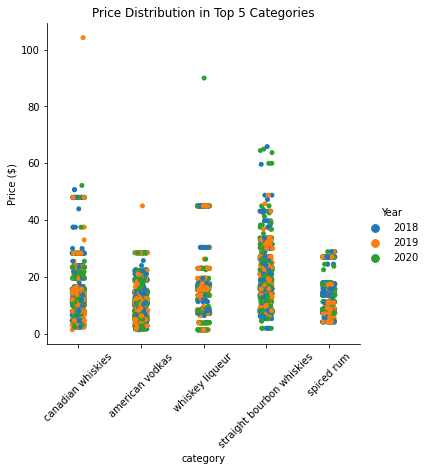

In [ ]:
df = pd.DataFrame(price_cat)
g = sns.catplot(x = "category", y = "state_bottle_retail", data = df.sample(5000, replace = False), hue = "Year").set(title = "Price Distribution in Top 5 Categories", ylabel = "Price ($)")
g.set_xticklabels(rotation=45)

Based off our graph, we can see that there are no notable changes in the pricing distribution of the top five categories of liquor since the pandemic. We can assume that the pandemic did not change the pricing of these top liquors.

###Change in Average Bottle Price

Finally, we look at the distribution of average bottle price per store in Iowa during the pandemic compared to historical data from 2018 and 2019 in order to see whether retailers have adjusted their strategies for COVID-19. *First, we look at the distribution of stores' average bottle prices by month.*

In [ ]:
%%bigquery --project $project_id cpm

SELECT EXTRACT(year from date) as Year, EXTRACT(month from date) as Month, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE state_bottle_retail < 100
AND EXTRACT(year from date) in (2018, 2019, 2020)
GROUP BY Year, Month, store_number

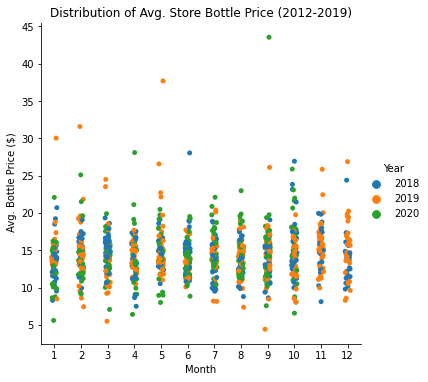

In [ ]:
df = pd.DataFrame(cpm)
g = sns.catplot(x = "Month", y = "avg_price", data = df.sample(1000, replace = False), hue = "Year").set(title = "Distribution of Avg. Store Bottle Price (2012-2019)", ylabel = " Avg. Bottle Price ($)")

While the price distributions among the top 5 categories differ, the distributions among different years per category are relatively even. It seems that the distribution of price per category was not impacted much by COVID-19.

For the most part, it seems that retailers have not adjusted their average pricing due to COVID-19, as the distributions seem fairly even over the years. However, the high outliers in these distributions are almost all from 2018 and 2019. This means that retailers that historically had a higher average bottle price decreased the average price of their inventories, perhaps as a result of the financial burden the pandemic has placed on many. This theory does is not aligned with the dramatic increase in high-price purchases in 2020 compared to previous years, however.

*Finally, we look at the distribution of retailers' average bottle prices in the top 5 liquor categories in 2020 compared to 2018 and 2019.*

In [ ]:
%%bigquery --project $project_id cpc
SELECT EXTRACT(year from date) as Year, LOWER(category_name) as Category, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE state_bottle_retail < 100
AND EXTRACT(year from date) in (2018, 2019, 2020)
AND LOWER(category_name) IN ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
GROUP BY Year, Category, store_number

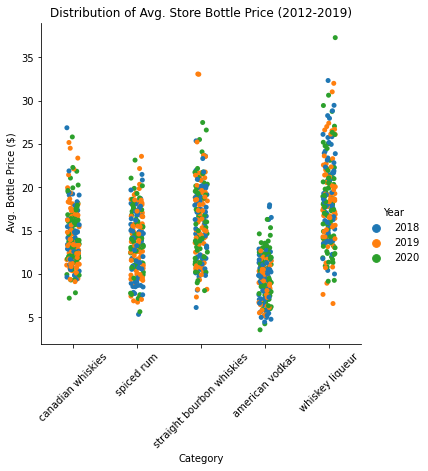

In [ ]:
df = pd.DataFrame(cpc)
g = sns.catplot(x = "Category", y = "avg_price", data = df.sample(1000, replace = False), hue = "Year").set(title = "Distribution of Avg. Store Bottle Price (2012-2020)", ylabel = " Avg. Bottle Price ($)")
g.set_xticklabels(rotation=45)

For the most part, these distributions seem equal within categories. Thus, it seems that stores haven't been significantly changing their inventory in the top 5 liquor categories compared to previous years.

## Data Prediction

In [ ]:
model_dataset_name = 'iowa_liquor'

dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('project-3-295318', 'iowa_liquor'))

###Training
From our analyses, we see that several factors contribute to the Iowa liquor market. The factors that especially contribute to the liquor market are the date (specifically the year and time of year), the average price per bottle, the number of bottles sold, and the volume of liquor sold. Below, we train a model using these features using the total liquor market in dollars for each city in Iowa on a given day as our label. Our training set contains the Iowa liquor sales data from 2012-2018.

In [ ]:
%%bigquery --project $project_id

CREATE OR REPLACE MODEL `iowa_liquor.market_model`
OPTIONS(model_type='linear_reg',optimize_strategy='batch_gradient_descent') AS 
(SELECT SUM(sale_dollars) as label,
       date,
       LOWER(city) as city,
       SUM(bottles_sold) as bottles_sold,
       SUM(volume_sold_liters) as volume_sold,
       AVG(state_bottle_retail) as avg_ppb
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(year from date) < 2019
    AND sale_dollars is not NULL
    AND date is not NULL
    and city is not NULL
    and bottles_sold is not NULL
    and volume_sold_liters is not NULL
    GROUP BY date, city)

""


In [ ]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `iowa_liquor.market_model`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,11,1.829644e+07,2.139672e+07,0.4,5078
1,0,10,1.841561e+07,2.152911e+07,0.8,6595
2,0,9,1.863949e+07,2.184558e+07,0.8,5692
3,0,8,1.905390e+07,2.234867e+07,0.4,6552
4,0,7,1.962352e+07,2.299921e+07,0.8,5989
5,0,6,2.046406e+07,2.398468e+07,0.4,5603
6,0,5,2.480336e+07,2.840550e+07,1.6,5648
7,0,4,3.036803e+07,3.511238e+07,0.8,7091
8,0,3,3.994818e+07,4.546070e+07,0.4,5610
9,0,2,5.205089e+07,5.921547e+07,0.8,5435


###Evaluating
Next, we evaluate our model on the 2019 data.

In [ ]:

%%bigquery --project $project_id
---evaluate on unseen evaluation data
SELECT
  *
FROM
  ML.EVALUATE(MODEL `iowa_liquor.market_model`,
  (SELECT SUM(sale_dollars) as label,
       date,
       LOWER(city) as city,
       SUM(bottles_sold) as bottles_sold,
       SUM(volume_sold_liters) as volume_sold,
       AVG(state_bottle_retail) as avg_ppb
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(year from date) = 2019
    AND sale_dollars is not NULL
    AND date is not NULL
    and city is not NULL
    and bottles_sold is not NULL
    and volume_sold_liters is not NULL
    GROUP BY date, city))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,6471.666753,6.852546e+07,0.993491,5615.64644,0.958585,0.979977


While our mean squared error is high, this is expected, as the total sales per city on a given day range anywhere from \$0 to \$721,371 with an average of \$16,559. Our r-squared value is very close to 1, meaning our model explains most of the accounts for the majority of variation in our data. Additionally, a mean absolute error of 6516 fits well into the daily market range, and a prediction of +=\$6,516 for the daily liquor market in a given Iowa city seems reasonable. Therefore, we move on to testing our model with the unseen data from 2020.

###Testing
Finally, we test our model on the previously unseen 2020 data.

In [ ]:
%%bigquery --project $project_id
--evaluate on unseen test set
SELECT
  *
FROM
 ML.EVALUATE(MODEL `iowa_liquor.market_model`, 
 (SELECT SUM(sale_dollars) as label,
       date,
       LOWER(city) as city,
       SUM(bottles_sold) as bottles_sold,
       SUM(volume_sold_liters) as volume_sold,
       AVG(state_bottle_retail) as avg_ppb
    FROM `bigquery-public-data.iowa_liquor_sales.sales`
    WHERE EXTRACT(year from date) = 2020
    AND sale_dollars is not NULL
    AND date is not NULL
    and city is not NULL
    and bottles_sold is not NULL
    and volume_sold_liters is not NULL
    GROUP BY date, city))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,6822.2652,6.255095e+07,1.115237,5869.867484,0.958678,0.986745


The statistics from this test closely mirror our evaluation. Again, our r-squared value is quite close to 1, meaning our model is very good at accounting for variance in data. The mean absolute error is a bit higher at 6897, but still reasonable given the wide range and average of Iowa's daily liquor market segmented by city. Our model is not perfect - our mean squared error is quite high, most likely because some transactions have a NULL sale\_dollars column, detracting from the model by not being able to provide it with datapoints from certain (date, city) tuples. However, overall we are happy with the performance of our model.

## Conclusion

From our analyses we are able to draw some significant insights regarding the Iowa liquor industry. All of the insights that we have drawn are outlined below:

**Understanding Liquor Sales by the Number of Transactions**
* The number of liquor transactions in 2020 was modestly greater than that of 2019
* We can make an assumption that the pandemic's severity seems to have some correlation with the number of liquor transactions in Iowa. This is evident in the peaks in increase in the number of transactions between 2019 and 2020.

**Understanding Iowa's Liquor Consumption Geographically**
* The top three cities by liquor revenue are Des Moines, Cedar Rapids, and Davenport.
* The top three counties are Polk, Linn, and Scott. 
* All top ten cities have experience an increase in average monthly revenue 
* Cities like Des Moines and Davenport experience the sharpest increase in average monthly revenue! Good for them!

**The Iowa Liquor Market**
* For each subsequent year, revenue increases modestly (~$10M a year)
* It seems that liquor purchases increase steadily throughout the year, plateau in the summer months, than spike in October, dip in November, and spike again in December. 
* We hypothesize that these two spikes may be due to the presence of heavy-drinking holidays in October and December (Halloween, Christmas, New Year's Eve), although it is interesting that while Thanksgiving falls in November, the liquor market consistently takes a dive during that month.
* 2020's liquor monthly sales does not prescribe to the same pattern as previous years.
* While the trends seem to match up in January and February (before COVID-19 reached Iowa), there is a marked increase in the retail liquor market in March and April, most likely due to stay-at-home orders and the closing of bars and restuaraunts. 
* In May 2020, the liquor market seems low, perhaps due to an ease in COVID-related restrictions that prompted Iowans to purchase liquor at bars and restaurants again before the weather improved and COVID-19 cases rose, as ever since June there has been a marked increase in retail liquor sales compared to previous years.

**Pricing Distribution of Liquor**
*  There are a few outliers in the pricing distribution of liquor-- we filtered these outliers out by filter for liquor < $100
* The pricing distribution of liquor is skewed to the right with a majority of liquor being in the \$10-\$20 range
* The average cost of liquor has been increasing year over year
* There was about a \$1.25 increase in average liquor retail price in Iowa compared to the historical average. This could be for several reasons, including reactionary price markup from wholesalers and retailers, or a willingness to spend a bit more on liquor as a reaction to spending less at bars and restaurants. 
* Patterns purchasing high-priced liquor do not align with precedent-- there was a sharp increase in high-priced bottles in the beginning of the pandemic

**Analyzing Iowa's Choice in Liquor**
* The top choice for liquor in Iowa prior to the Pandemic is American vodka, Canadian whisky, and spiced rum!
* There is a general increase in number of bottles sold for each category of alcohol, we can see that 2020's liquor trends do not prescribe to pre-pandemic times. 
* Straight bourbon whiskies, american flavored vodka, and imported brandies saw a sharp increase in bottles sold in 2020.

**Price Distribution in Top Categories**
* Price amongst the top 5 categories is fairly evenly distributed. Canadian whiskies and straight bourbon whiskies tend to have more outliers with higher prices.
* For the most part, the average price spent on liquor of any of the top 5 categories remains relatively constant throughout the year.
* We can assume that the pandemic did not change the pricing of these top liquors.

**Change in Average Bottle Price**
* It seems that the distribution of price per category was not impacted much by COVID-19.
* It seems that stores haven't been significantly changing their inventory in the top 5 liquor categories compared to previous years.

From our analyses we can conclude that liquor consumption and sales have been greatly disrupted as a result of the pandemic. Namely the number of transactions and sales have all increased as a direct result of the pandemic disrupting normal liquor trends and patterns. Specifically, the peaks of the pandemic correlated with more sales. Interestingly, we know that the pricing of liquor was unaffected by the pandemic, an unusual contradiction from our original hypothesis. 

We recognize that because this is wholesale data , we have limited perceptions about the consumers themselves. If there was another table for retail invoices with a store ID and information about the customer then we would be able to provide more directed analyses of our results. Was the increase in liquor consumption a result of the economic fallout of the pandemic or because of the social distancing? What age bracket drank more as a result of the pandemic?


##Additional Analyses 

Below is additional analyses we did that you can read at your leisure. 

This analyses looked at the distribution of high-price bottle solds each year.

In [ ]:
%%bigquery --project $project_id hpb_yr

SELECT EXTRACT(year from date) as year, count(*) as sold
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
AND state_bottle_retail > 100
GROUP BY year
ORDER BY year asc

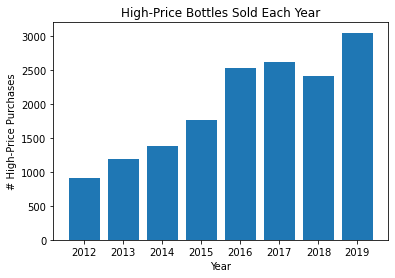

In [ ]:
plt.figure()
plt.bar(hpb_yr["year"], hpb_yr["sold"])
plt.title("High-Price Bottles Sold Each Year")
plt.xlabel("Year")
plt.ylabel("# High-Price Purchases")
plt.autoscale()

It seems that purchase of high-price liquors also increases year to year, with the exception of 2018, by about 250 to 750 bottles. This is most likely due to an increase of the Iowa liquor market overall.

---

To see when high-price purchases are most popular, we take the average number of high-price purchases per month from 2012 to 2019.

In [ ]:
%%bigquery --project $project_id hpd

SELECT EXTRACT(month from date) as month, state_bottle_retail
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE EXTRACT(year from date) < 2020
AND state_bottle_retail > 100
ORDER BY month

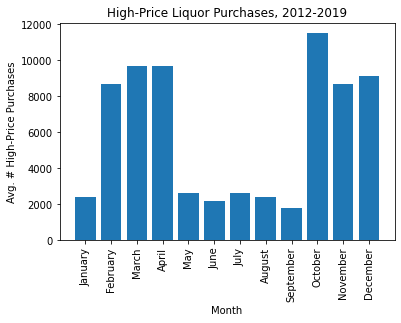

In [ ]:
plt.figure()
plt.bar(hpd["month"], hpd["state_bottle_retail"])
plt.title("High-Price Liquor Purchases, 2012-2019")
plt.xlabel("Month")
plt.ylabel("Avg. # High-Price Purchases")
plt.xticks(range(0,13),["","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], rotation=90)
plt.autoscale()

It looks like most "high-price" bottles were purchased in the colder months, with the exception of January, while there is a lag in higher purchases in the warmer months. This may be because in January, people may try to drink less for New Year's Resolutions, while there are several holidays celebrated by large groups, families, or significant others in the colder months that may warrant the purchase of "special occasion alcohol", such as Valentine's Day, Halloween, Thanksgiving, and Christmas. However, this theory would not explain the high sales in March and April, which do not contain many major celebratory holidays. 




This analysis looked into the top 20 liquor categories by bottle sold pre-covid.

In [ ]:
%%bigquery --project $project_id category_count

SELECT
    LOWER(category_name),
    SUM(bottles_sold)/8000000 AS count
FROM `bigquery-public-data.iowa_liquor_sales.sales` t1
WHERE date < '2020-01-01'
GROUP BY
    LOWER(category_name)
ORDER BY SUM(bottles_sold) DESC
LIMIT 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

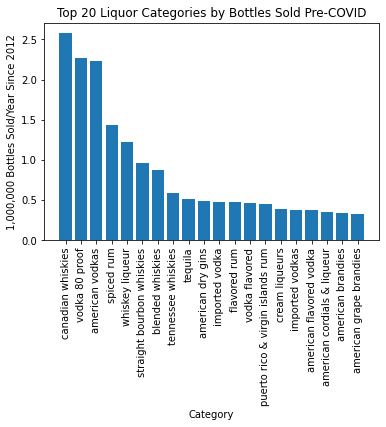

In [ ]:
plt.figure()
plt.bar(category_count["f0_"], category_count["count"])
plt.title("Top 20 Liquor Categories by Bottles Sold Pre-COVID")
plt.xlabel("Category")
plt.ylabel("1,000,000 Bottles Sold/Year Since 2012")
plt.xticks(rotation = 90)

After merging categories, American vodka is a clear winner among Iowans, trailed by Canadian whisky and spiced rum.

---

This analysis looked at the changes in top 5 categories monthly sales. To do this, we plot the average number of bottles sold per month from 2012-2019:

In [ ]:
%%bigquery --project $project_id category_count_month
SELECT
    LOWER(category_name) as category,
    SUM(bottles_sold)/800000 AS count,
    EXTRACT(month from date) as month
FROM 
  (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottles_sold, date
  FROM bigquery-public-data.iowa_liquor_sales.sales)
WHERE LOWER(category_name) in ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
AND date BETWEEN '2012-01-03' AND '2019-12-31'
GROUP BY category, month
ORDER BY category, month ASC

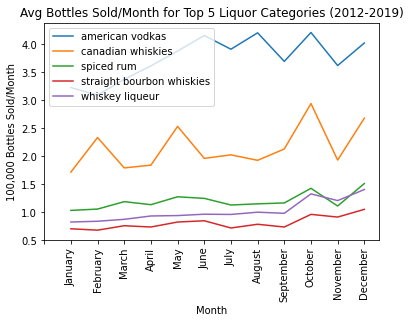

In [ ]:
df = pd.DataFrame(category_count_month)
dfs = [rows for _, rows in df.groupby('category')]


fig, ax = plt.subplots()
ax.plot(dfs[0]["month"], dfs[0]["count"], label="american vodkas")
ax.plot(dfs[1]["month"], dfs[1]["count"], label="canadian whiskies")
ax.plot(dfs[2]["month"], dfs[2]["count"], label="spiced rum")
ax.plot(dfs[3]["month"], dfs[3]["count"], label="straight bourbon whiskies")
ax.plot(dfs[4]["month"], dfs[4]["count"], label="whiskey liqueur")
ax.set_title("Avg Bottles Sold/Month for Top 5 Liquor Categories (2012-2019)")
ax.set_xlabel("Month")
ax.set_ylabel("100,000 Bottles Sold/Month")
ax.set_xticks(np.arange(13))
ax.set_xticklabels(["","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()

It looks like vodka sales are highest during warmer months, then spike again in October and December (most likely for Halloween and Christmas/New Year's Eve). Canadian whiskies are most popular in February, May, October, and December, which may be partly explained by some peoples' preference to drink whisky in the colder months. The spikes in May and October may also be correlated to the first and last freeze, when Iowa farmers are able to start planting their crops in May and must harvest in October. The rest of the three categories remain relatively constant.

---

By looking at the dataset, it is clear that bottle volume of product varies quite a bit from 50mL to 1L. The above distribution does not take this into account, so the query and graph below show the top 20 categories purchased per year based on volume from January 2017.

In [ ]:
%%bigquery --project $project_id category_count_vol
--rewrite query to merge similar categories
SELECT
    LOWER(category_name),
    SUM(bottle_volume_ml)/8000000 AS vol
FROM  
  (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottle_volume_ml, date
  FROM bigquery-public-data.iowa_liquor_sales.sales)
WHERE date < '2020-01-01'
GROUP BY
    LOWER(category_name)
ORDER BY SUM(bottle_volume_ml) DESC
LIMIT 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

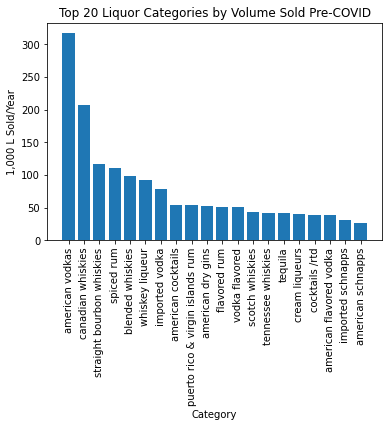

In [ ]:
plt.figure()
plt.bar(category_count_vol["f0_"], category_count_vol["vol"])
plt.title("Top 20 Liquor Categories by Volume Sold Pre-COVID")
plt.xlabel("Category")
plt.ylabel("1,000 L Sold/Year")
plt.xticks(rotation = 90)

This analysis looked into the changes in the top 5 category by liter solds. 

In [ ]:
%%bigquery --project $project_id vol_month
SELECT
    LOWER(category_name) as category,
    SUM(bottle_volume_ml)/800000 AS count,
    EXTRACT(month from date) as month
FROM (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottle_volume_ml, date
  FROM bigquery-public-data.iowa_liquor_sales.sales)
WHERE LOWER(category_name) in ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
AND date < '2020-01-01'
GROUP BY category, month
ORDER BY category, month ASC

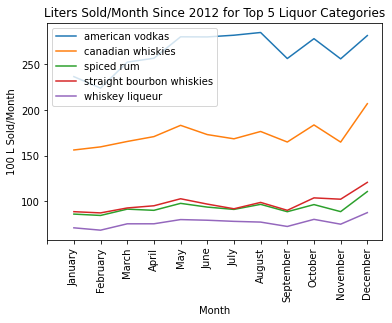

In [ ]:
df = pd.DataFrame(vol_month)
dfs = [rows for _, rows in df.groupby('category')]

fig, ax = plt.subplots()
ax.plot(dfs[0]["month"], dfs[0]["count"], label="american vodkas")
ax.plot(dfs[1]["month"], dfs[1]["count"], label="canadian whiskies")
ax.plot(dfs[2]["month"], dfs[2]["count"], label="spiced rum")
ax.plot(dfs[3]["month"], dfs[3]["count"], label="straight bourbon whiskies")
ax.plot(dfs[4]["month"], dfs[4]["count"], label="whiskey liqueur")
ax.set_title("Liters Sold/Month Since 2012 for Top 5 Liquor Categories")
ax.set_xlabel("Month")
ax.set_ylabel("100 L Sold/Month")
ax.set_xticks(np.arange(13))
ax.set_xticklabels([" ","January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()

It seems that by volume, vodka sales are lowest in the beginning of the year, start to rise in March, and stay relatively high until the end of the year. Canadian whiskies are most popular in December but remain constant otherwise, and the three other categories remain constant.

In the top 20 categories, all have seen an increase in bottles sold compared to the historical average, with whiskey liqueur seeing the largest increase. 
Below, liquor categories by volume sold:

In [ ]:
%%bigquery --project $project_id vol_change

SELECT b.category, b.count/8000000 as count_before, a.count/930000 as count_after
FROM
  (SELECT LOWER(category_name) as category, SUM(bottle_volume_ml) AS count,
  FROM 
    (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottle_volume_ml, date
    FROM bigquery-public-data.iowa_liquor_sales.sales)
  WHERE date < '2020-03-01'
  AND EXTRACT(month from date) BETWEEN 3 AND 10
  GROUP BY category) b,
  (SELECT LOWER(category_name) as category, SUM(bottle_volume_ml) AS count,
  FROM 
    (SELECT CASE WHEN LOWER(category_name) = "imported vodkas" OR category_name = "imported vodka" then "imported vodka"
    WHEN LOWER(category_name) = "american vodkas" OR LOWER(category_name) = "vodka 80 proof" then "american vodkas"
    ELSE category_name END as category_name, bottle_volume_ml, date
    FROM bigquery-public-data.iowa_liquor_sales.sales)
  WHERE date >= '2020-03-01'
  GROUP BY category) a
WHERE b.category = a.category
ORDER BY b.count DESC
LIMIT 20

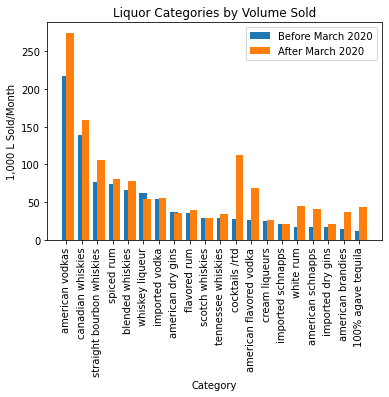

In [ ]:
index = np.arange(20)
bar_width = 0.5
fig, bs = plt.subplots()
pre = bs.bar(vol_change["category"], vol_change["count_before"], bar_width, label = "Before March 2020", align="center")
post = bs.bar(vol_change["category"], vol_change["count_after"], bar_width, label = "After March 2020", align="edge")
bs.set_title("Liquor Categories by Volume Sold")
bs.set_xlabel("Category")
bs.set_ylabel("1,000 L Sold/Month")
plt.setp(bs.xaxis.get_majorticklabels(), rotation=90)
bs.autoscale()
bs.legend()

###Store-Based Distributions

In order to explore how different aspects of the Iowa liquor market vary by store, we first plot the distribution of the average price per bottle of each liquor store in Iowa, bucketing by year.

In [ ]:
%%bigquery --project $project_id p_yr

SELECT EXTRACT(year from date) as Year, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE state_bottle_retail < 100
AND EXTRACT(year from date) < 2020
GROUP BY year, store_number

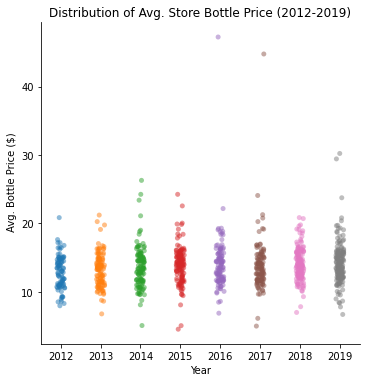

In [ ]:
df = pd.DataFrame(p_yr)
g = sns.catplot(x = "Year", y = "avg_price", alpha=.5, data = df.sample(1000, replace = False)).set(title = "Distribution of Avg. Store Bottle Price (2012-2019)", ylabel = " Avg. Bottle Price ($)")

It seems that the average price per bottle per store in Iowa has a fairly equal distribution given the year, with around \$8 on the low side and \$20 on the high side. There are also some low and high outliers. The distribution seems to widen and move up a tiny bit over time, most likely due to small yearly markups.

In order to see if the average price per bottle per liquor store in Iowa changes month by month, we take the average price per bottle from each liquor store in Iowa from 2012-2019 in a given month and plot the distribution.

In [ ]:
%%bigquery --project $project_id p_m

SELECT EXTRACT(month from date) as Month, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE state_bottle_retail < 100
AND EXTRACT(year from date) < 2020
GROUP BY Month, store_number

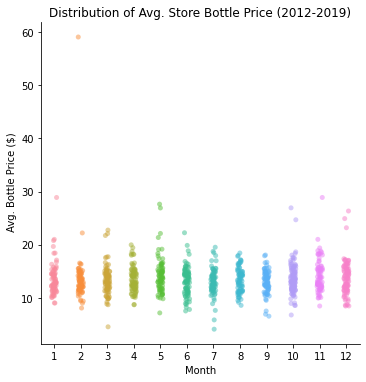

In [ ]:
df = pd.DataFrame(p_m)
g = sns.catplot(x = "Month", y = "avg_price", alpha=.5, data = df.sample(1000, replace = False)).set(title = "Distribution of Avg. Store Bottle Price (2012-2019)", ylabel = " Avg. Bottle Price ($)")

Again, it seems that the distribution remains relatively constant, with some high and low outliers. 

Next, we plot the distribution of average price per bottle per liquor store in Iowa by top 5 category.

In [ ]:
%%bigquery --project $project_id p_c

SELECT LOWER(category_name) as Category, AVG(state_bottle_retail) as avg_price
FROM `bigquery-public-data.iowa_liquor_sales.sales`
WHERE state_bottle_retail < 100
AND EXTRACT(year from date) < 2020
AND LOWER(category_name) IN ("canadian whiskies", "american vodkas", "straight bourbon whiskies", "spiced rum", "whiskey liqueur")
GROUP BY Category, store_number

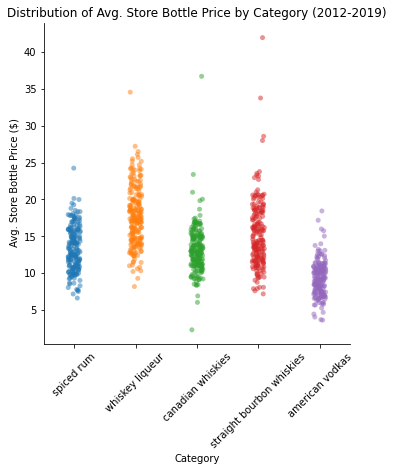

In [ ]:
df = pd.DataFrame(p_c)
g = sns.catplot(x = "Category", y = "avg_price", alpha=.5, data = df.sample(1000, replace = False)).set(title = "Distribution of Avg. Store Bottle Price by Category (2012-2019)", ylabel = " Avg. Store Bottle Price ($)")
g.set_xticklabels(rotation=45)

The average price per bottle per store distribution of American vodkas in Iowa is markedly lower than the rest of the categories, and about as widely distributed as spiced rum and Canadian whiskies. Whiskey liqueur and straight bourbon whiskies have a higher distribution in average price per bottle per store, most likely because there are a wide variety of liquors even within these specific categories that cater to several different tastes, while categories like American vodkas are most likely lower-quality.